<a href="https://colab.research.google.com/github/angelhb/blockchain-starter-kit-20180620084755065/blob/master/IANotebook_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


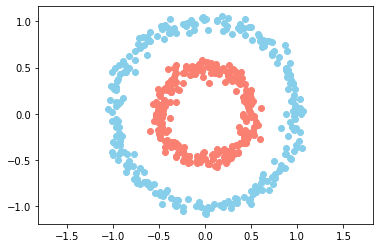

In [24]:
# create dataset
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0]== 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
plt.axis ("equal")
plt.show()


In [4]:
# Clase de la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1







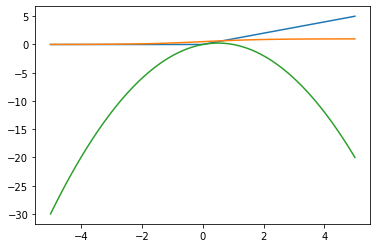

In [6]:
# Funciones de activación

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum (0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))
plt.plot(_x,sigm[0](_x))
plt.plot(_x,sigm[1](_x))

In [7]:
  l0 = neural_layer(p, 4, sigm)     # layer 0  
  l1 = neural_layer(4, 8, sigm)     # layer 1
  # ....
  
  def create_nn(topology, act_f):

    nn = []

    for l, layer in enumerate(topology[:-1]):
      nn.append(neural_layer(topology[l], topology[l+1], act_f))

    return nn



In [27]:
topology = [p, 4, 8, 16, 8, 4, 1]
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp- Yr) ** 2),
           lambda Yp, Yr: (Yp-Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):    # en train pasará todo,  el paso adelante , el back pass y el descenso de gradiente
  
  out = [(None, X)]

  # Forware pass
  
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    # Backware pass (training  1)
    deltas =  [] 

    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      
      
      
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
        
          # calcular delta ultima capa
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      _W = neural_net[l].W
          # calcular delta respecto a capa previa


    # Gradient descent   (training 2)
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0]  *  lr 

  return out[-1][1]

train (neural_net, X, Y, l2_cost, 0.5)
print("")

0.255038886777108
(500, 1)
(500, 4)
(500, 8)
(500, 16)
(500, 8)
(500, 4)


array([[0.42885216],
       [0.42916789],
       [0.42935306],
       [0.42914144],
       [0.42871332],
       [0.42943431],
       [0.42861111],
       [0.42903009],
       [0.42973872],
       [0.42934351],
       [0.42815981],
       [0.42937804],
       [0.42833557],
       [0.42858222],
       [0.42963998],
       [0.42981044],
       [0.42941314],
       [0.42979161],
       [0.4282535 ],
       [0.42884826],
       [0.42921822],
       [0.42940575],
       [0.42848215],
       [0.42896276],
       [0.42918017],
       [0.42818665],
       [0.42937863],
       [0.42950192],
       [0.42852276],
       [0.42903749],
       [0.42825233],
       [0.42801348],
       [0.42894614],
       [0.42813794],
       [0.42930276],
       [0.4290976 ],
       [0.42859137],
       [0.42886094],
       [0.42928569],
       [0.4290538 ],
       [0.42960747],
       [0.42830019],
       [0.42970526],
       [0.42983264],
       [0.42862012],
       [0.4294666 ],
       [0.42931374],
       [0.428